In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('spotify2019.csv')

In [3]:
data.head(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0


In [4]:
print(data.isnull().sum())

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
duplicates = data[data.duplicated(subset=['track_id'], keep=False)]
print(f"Jumlah duplikat: {len(duplicates)}")

Jumlah duplikat: 665


In [7]:
# Drop dupliactes by 'track_id'
data = data.drop_duplicates(subset=['track_id'], keep='first')

In [8]:
# Numerical feature
data_numeric = data.select_dtypes(include=['float64', 'int64'])

In [9]:
data['tempo'] = pd.qcut(data['tempo'], q=5, labels=False) # tempo is bined into 5 bin

In [10]:
data['duration_ms'] = data['duration_ms'].apply(lambda x: x / 60000) #convert miliseconds to minutes
data.rename(columns={'duration_ms': 'duration_min'}, inplace=True)

In [11]:
import numpy as np

data['key_sin'] = np.sin(2 * np.pi * data['key']/12) # mapping key to x y coordinates in circle unit
data['key_cos'] = np.cos(2 * np.pi * data['key']/12)

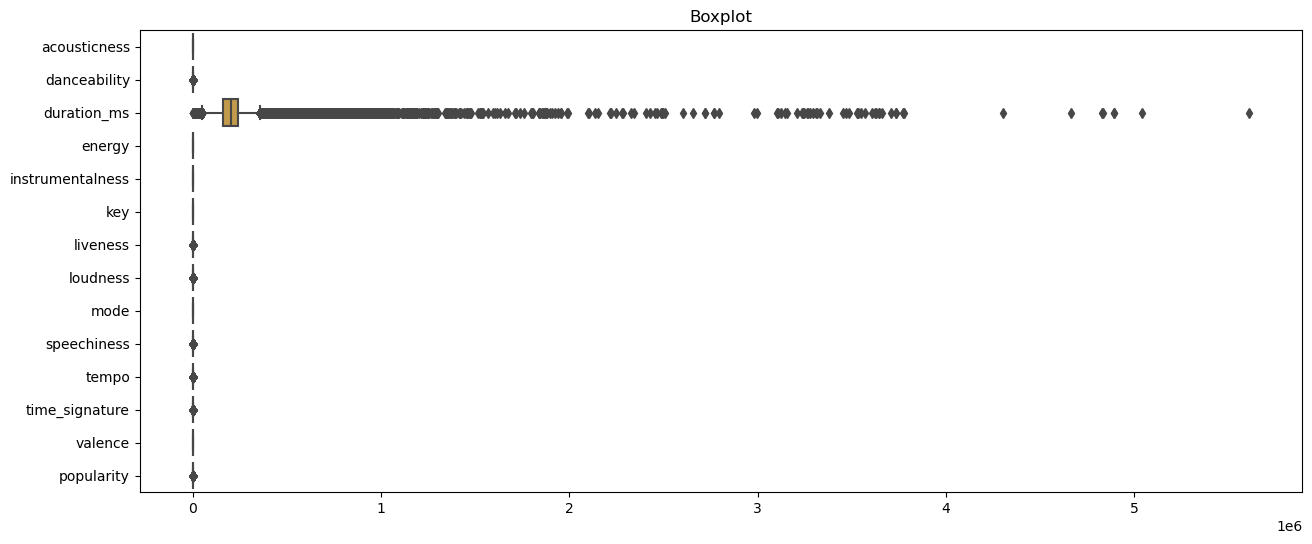

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=data_numeric, orient='h')
plt.title('Boxplot')
plt.show()

In [13]:
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True) # remove outlier based on 1.5 * IQR range
data

,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos
0,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,2.315217,0.723,0.000000,9,0.0824,-5.890,0,0.0454,2,4,0.3820,56,-1.000000,-1.836970e-16
1,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,2.089683,0.579,0.912000,5,0.0994,-12.118,0,0.0701,2,4,0.6410,0,0.500000,-8.660254e-01
2,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,2.066933,0.792,0.878000,7,0.0332,-10.277,1,0.0661,2,4,0.9280,0,-0.500000,-8.660254e-01
3,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,2.066933,0.417,0.919000,9,0.1060,-10.783,0,0.0793,2,4,0.8370,0,-1.000000,-1.836970e-16
4,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,2.212367,0.720,0.863000,4,0.0727,-8.895,0,0.1510,2,4,0.9340,0,0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81765,Echos,6Tgd0DhWYzCWrwZZB6BPNw,Revival,0.668000,0.211,4.651167,0.284,0.000111,1,0.1050,-10.317,1,0.0385,0,4,0.0638,51,0.500000,8.660254e-01
81766,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,3.175650,0.801,0.000000,11,0.0991,-5.174,1,0.0323,3,4,0.2890,57,-0.500000,8.660254e-01
81767,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,3.243050,0.249,0.000000,9,0.1030,-13.233,1,0.0437,1,4,0.3460,60,-1.000000,-1.836970e-16
81768,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,2.319850,0.532,0.000000,8,0.0997,-8.351,0,0.2060,4,4,0.5460,47,-0.866025,-5.000000e-01


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


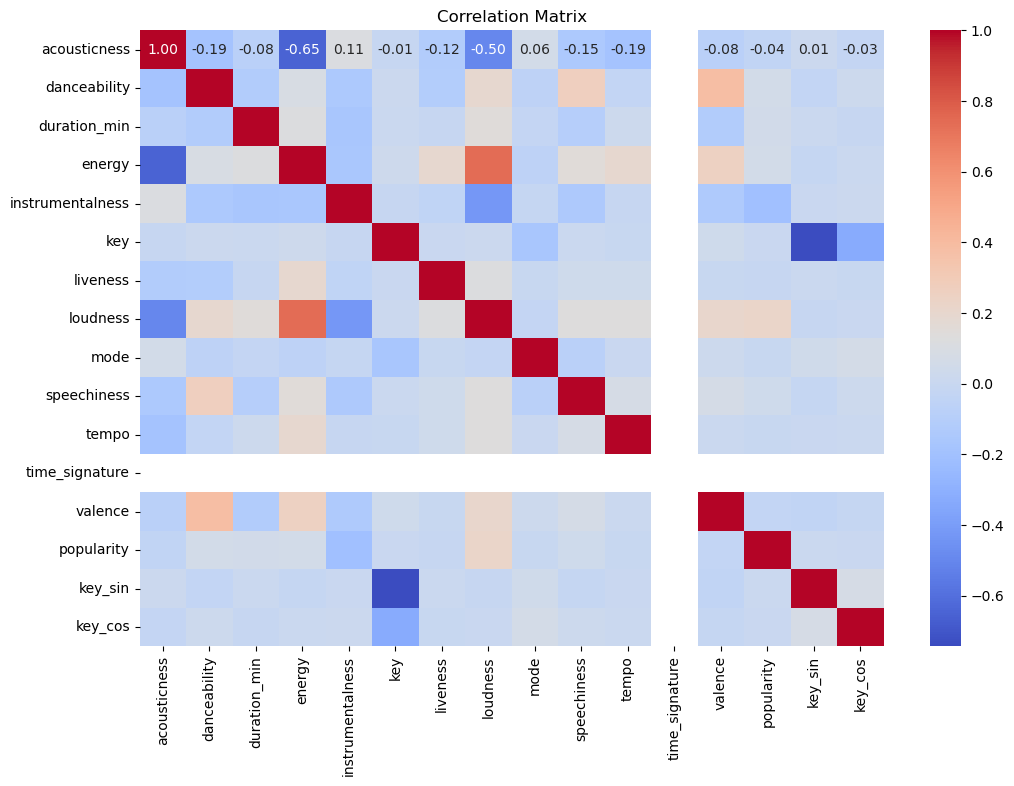

In [14]:
data_num = data.select_dtypes(include=['float64', 'int64']) # correlation between numeric features
correlation_matrix = data_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

IndexError: index 5 is out of bounds for axis 0 with size 5

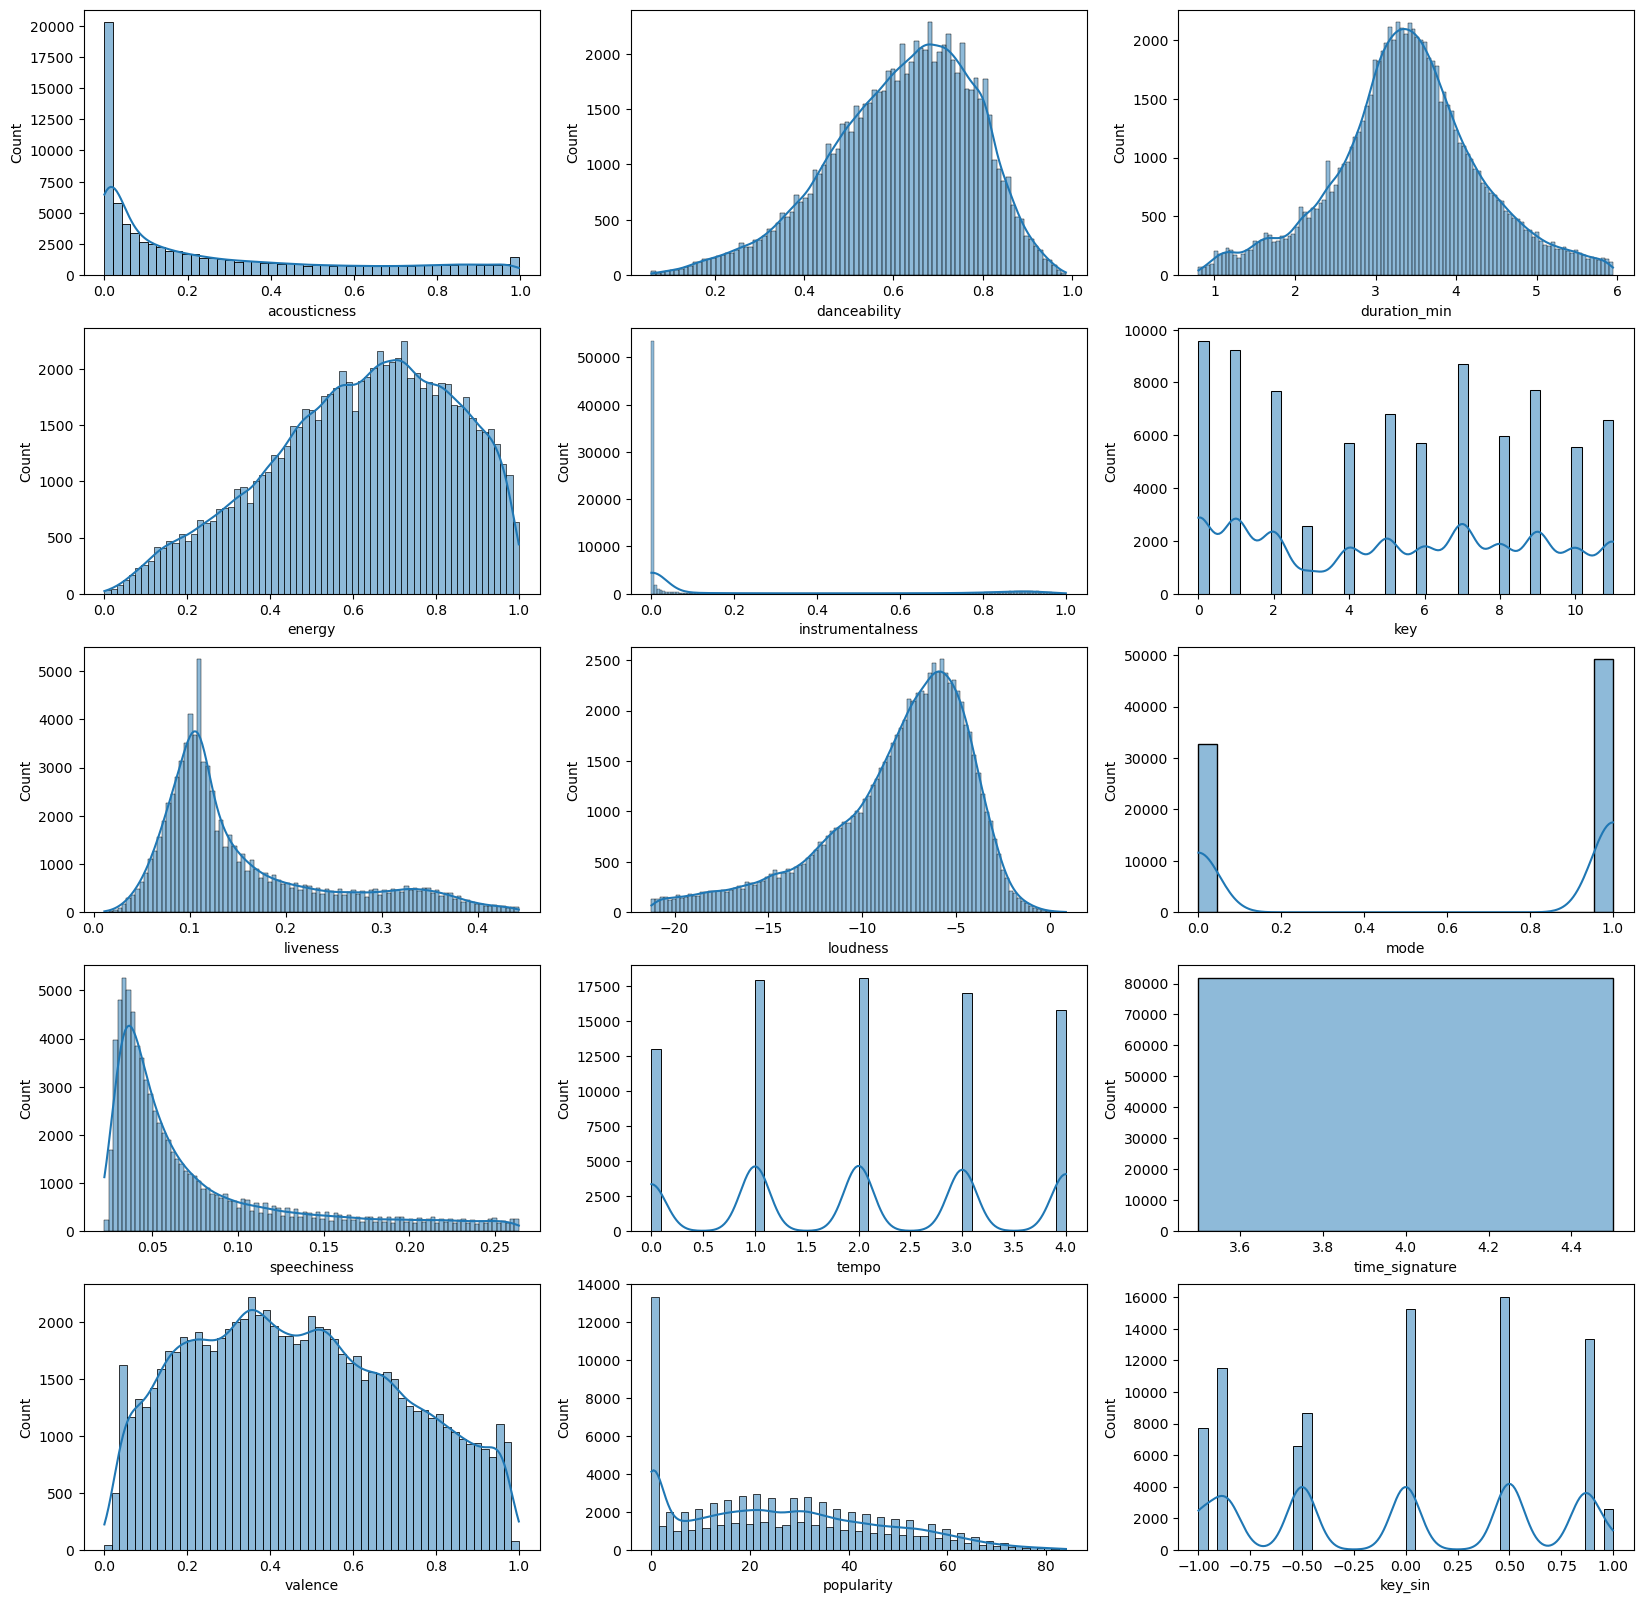

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20)) # display histogram distribution

for i, col in enumerate(data_num.columns):
  sns.histplot(data=data_num, x=col, kde=True, ax=axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

data_numeric = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# GMM Clustering
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)


data_clustered_gmm = data.copy()
data_clustered_gmm['cluster'] = gmm_labels


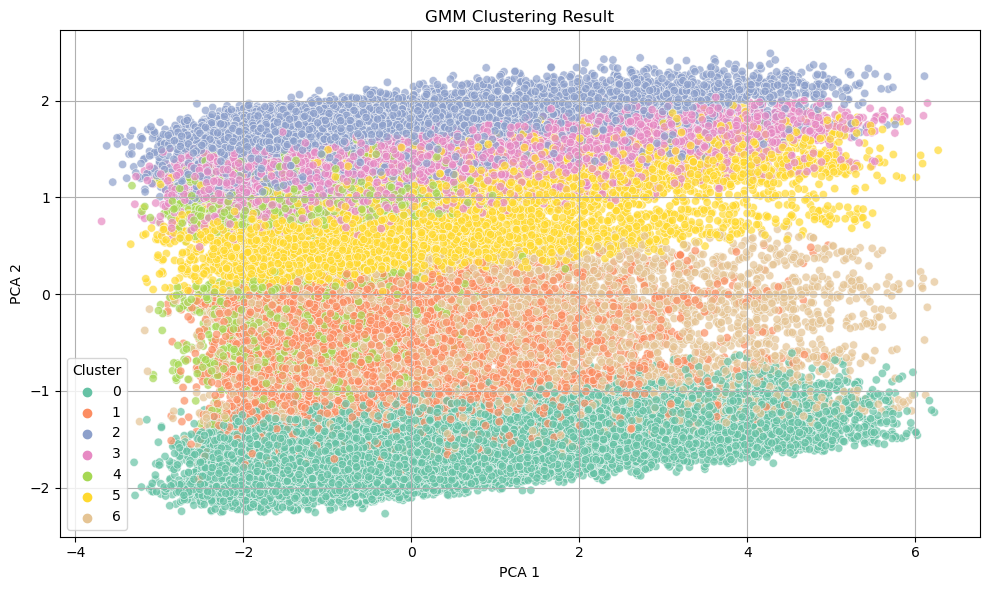

In [18]:
# PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(data_scaled)
data_clustered_gmm['PCA1'] = pca_result[:, 0]
data_clustered_gmm['PCA2'] = pca_result[:, 1]

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_clustered_gmm,
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='Set2',
    alpha=0.7
)
plt.title("GMM Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Clusters Summary

cluster_summary = data_clustered_gmm.groupby('cluster')[data_num.columns].mean().round(2)
display(cluster_summary)

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos
cluster,,,,,,,,,,,,,,,,
0,0.27,0.62,3.38,0.62,0.19,0.93,0.16,-8.16,0.74,0.08,2.07,4.0,0.45,25.83,0.43,0.81
1,0.30,0.62,3.52,0.62,0.00,4.25,0.16,-7.17,0.53,0.06,2.00,4.0,0.49,28.84,0.73,-0.57
2,0.24,0.64,3.41,0.64,0.20,9.72,0.16,-8.01,0.00,0.08,2.08,4.0,0.47,25.27,-0.79,0.32
3,0.29,0.61,3.37,0.61,0.16,9.28,0.15,-8.05,1.00,0.07,2.06,4.0,0.48,26.58,-0.83,0.11
4,0.17,0.66,3.42,0.70,0.00,6.34,0.17,-6.18,0.59,0.12,2.07,4.0,0.52,29.08,-0.19,-0.82
5,0.31,0.60,3.38,0.60,0.24,6.47,0.15,-8.75,0.61,0.07,2.03,4.0,0.45,24.63,-0.24,-0.94
6,0.34,0.57,3.34,0.57,0.46,4.25,0.15,-10.14,0.46,0.07,2.06,4.0,0.42,21.83,0.73,-0.57


In [ ]:
# Top 100 By Popularity in Each Clusters

top_100_popular_each_cluster = (
    data_clustered_gmm
    .sort_values(['cluster', 'popularity'], ascending=[True, False])
    .groupby('cluster')
    .head(100)
    .reset_index(drop=True)
)

for c in sorted(top_100_popular_each_cluster['cluster'].unique()):
    print(f"\n=== Cluster {c} ===")
    display(
        top_100_popular_each_cluster[top_100_popular_each_cluster['cluster'] == c].head(10)
    )


=== Cluster 0 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
0,Galantis,1pfgsjmxVZhoZpeDx6POKv,Bones (feat. OneRepublic),0.00464,0.660,3.429883,0.788,0.000000,0,0.1790,...,0.0374,2,4,0.494,84,0.0,1.000000,0,-1.460143,-1.801371
1,Juice WRLD,41MCdlvXOl62B7Kv86Bb1v,Empty,0.07580,0.745,4.140517,0.561,0.000000,0,0.1330,...,0.0807,0,4,0.449,84,0.0,1.000000,0,-0.969611,-1.694271
2,Ariana Grande,4T652DlATVHe0jdLKaN3Bw,in my head,0.17300,0.662,3.715783,0.600,0.000137,0,0.1090,...,0.0703,3,4,0.331,84,0.0,1.000000,0,-0.726563,-1.767563
3,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,What A Time (feat. Niall Horan),0.66200,0.518,2.888450,0.467,0.000000,0,0.0853,...,0.0302,3,4,0.386,84,0.0,1.000000,0,0.650397,-1.665151
4,5 Seconds of Summer,6GzApXoBQiiAjak3tOQfV3,Lie To Me (feat. Julia Michaels),0.01320,0.611,2.497967,0.520,0.000000,0,0.1050,...,0.0346,4,4,0.771,84,0.0,1.000000,0,-1.094672,-1.708989
5,Jonas Brothers,3QmolSZqjjLksTUvZJ6pPS,Cool,0.01060,0.650,2.785333,0.619,0.000000,0,0.1670,...,0.0555,4,4,0.657,84,0.0,1.000000,0,-1.449834,-1.768138
6,Ariana Grande,2rPE9A1vEgShuZxxzR2tZH,"thank u, next",0.28000,0.724,3.455550,0.647,0.000000,1,0.1020,...,0.0658,1,4,0.435,84,0.5,0.866025,0,-0.666028,-1.889653
7,Billie Eilish,7wC5eZcFS1Q1BsQ35DU6H4,come out and play,0.69300,0.640,3.506267,0.321,0.030700,0,0.1140,...,0.0931,4,4,0.177,84,0.0,1.000000,0,1.757089,-1.556872
8,Kodak Black,2MShy1GSSgbmGUxADNIao5,Calling My Spirit,0.09960,0.910,2.533333,0.366,0.000000,1,0.2610,...,0.0941,2,4,0.740,84,0.5,0.866025,0,-0.575540,-1.736221
9,Juice WRLD,3oDkdAySo1VQQG0ptV7uwa,Lean Wit Me,0.04530,0.667,2.929250,0.644,0.000000,1,0.0905,...,0.1740,4,4,0.189,84,0.5,0.866025,0,-1.345064,-2.025570



=== Cluster 1 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
100,Chris Brown,7uiBocndm12aKbsdnQ3Scx,Undecided,0.1720,0.441,3.121633,0.527,0.000000,3,0.2330,...,0.0966,1,4,0.589,84,1.000000,6.123234e-17,1,-0.582985,-1.644603
101,Lil Peep,2v5JTeM6hSmi5wWy7jiwrI,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,0.1500,0.741,3.893550,0.845,0.000000,5,0.1740,...,0.0381,3,4,0.926,84,0.500000,-8.660254e-01,1,-2.498419,-0.097478
102,Zara Larsson,507tQXutCPYNFkpOq8tmKF,Don't Worry Bout Me,0.0797,0.752,3.480200,0.706,0.000752,5,0.1290,...,0.0636,2,4,0.330,84,0.500000,-8.660254e-01,1,-1.163653,-0.455102
103,Charlie Puth,5cF0dROlMOK5uNZtivgu50,Attention,0.1090,0.775,3.479783,0.613,0.000023,3,0.1340,...,0.0542,1,4,0.797,84,1.000000,6.123234e-17,1,-1.489905,-1.193437
104,Kevin Roldan,1DcxnVNFAyVl2sDQ646pXS,PPP,0.3630,0.786,2.150667,0.650,0.000082,4,0.1220,...,0.1090,1,4,0.712,84,0.866025,-5.000000e-01,1,-0.806228,-0.920782
105,Dennis DJ,5yH8pYxNckOU1cxfPsMIaz,Agora é Tudo Meu,0.7000,0.848,2.866633,0.933,0.000003,5,0.1840,...,0.1060,3,4,0.506,83,0.500000,-8.660254e-01,1,-1.847136,-0.053961
106,Russ,4ve2uzqdwnHr20G5YgMMqr,Missin You Crazy,0.0991,0.716,3.778217,0.729,0.000000,5,0.0842,...,0.1170,3,4,0.276,83,0.500000,-8.660254e-01,1,-1.341599,-0.485877
107,King Princess,0CZ8lquoTX2Dkg7Ak2inwA,1950,0.6480,0.600,3.752217,0.535,0.000005,4,0.1620,...,0.1070,0,4,0.269,83,0.866025,-5.000000e-01,1,0.470311,-1.011927
108,David Guetta,33IOhptvC2Qoy2UhjiHXLV,Flames,0.0723,0.609,3.250000,0.726,0.000008,5,0.0895,...,0.0414,1,4,0.362,83,0.500000,-8.660254e-01,1,-1.153072,-0.103704
109,TOMORROW X TOGETHER,32h6yQGn4oAhZ0HRsTMX26,CROWN,0.0505,0.622,3.845117,0.800,0.000000,5,0.0619,...,0.0425,1,4,0.580,82,0.500000,-8.660254e-01,1,-1.279012,-0.429745



=== Cluster 2 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
200,Twenty One Pilots,23OXdR7YuUBVWh5hSnYJau,Chlorine,0.07350,0.609,5.407783,0.674,0.060000,10,0.3450,...,0.0548,0,4,0.315,84,-0.866025,5.000000e-01,2,-1.184529,1.434950
201,Juice WRLD,4mUIe9gfsdtsVP2zFIl74x,Maze,0.12600,0.674,2.401500,0.726,0.000002,11,0.1150,...,0.1410,4,4,0.443,83,-0.500000,8.660254e-01,2,-2.081123,1.178090
202,Bazzi,7njKgVl3AnLflRad38o7AG,Paradise,0.08280,0.844,2.817300,0.644,0.000000,11,0.1130,...,0.0479,2,4,0.591,83,-0.500000,8.660254e-01,2,-1.498678,1.316491
203,Ella Mai,6CTWathupIiDs7U4InHnDA,Trip,0.22500,0.477,3.566550,0.610,0.000000,11,0.1070,...,0.1440,0,4,0.358,83,-0.500000,8.660254e-01,2,-0.750165,1.261452
204,Lil Mosey,1iPBD72u3nAyFEeardYuBV,Kamikaze,0.30100,0.792,2.320000,0.571,0.000000,8,0.1000,...,0.0940,1,4,0.556,83,-0.866025,-5.000000e-01,2,-0.715841,1.791284
205,Nicky Jam,39N9RPD9MRb5WmoLzNzPeA,X,0.03640,0.595,2.893800,0.773,0.001080,9,0.3340,...,0.0549,4,4,0.711,83,-1.000000,-1.836970e-16,2,-2.384168,1.566086
206,Future,7wcyO1rrH3Ru4t659IjG41,Crushed Up,0.04150,0.781,2.499150,0.597,0.000000,10,0.1520,...,0.2300,4,4,0.544,82,-0.866025,5.000000e-01,2,-2.120090,1.592982
207,ITZY,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,0.00116,0.790,3.331233,0.853,0.000042,11,0.3290,...,0.0665,2,4,0.713,82,-0.500000,8.660254e-01,2,-2.745436,1.165617
208,Anitta,7G2XZhDNHo7SSDWSVxC0UT,Terremoto,0.32900,0.891,2.437933,0.805,0.000000,8,0.2770,...,0.0898,1,4,0.967,82,-0.866025,-5.000000e-01,2,-2.165632,1.760206
209,Bad Bunny,5YOkA7qd2983FtBQnP8sYx,Solo de Mi,0.28700,0.743,3.299467,0.730,0.000081,10,0.0778,...,0.1250,4,4,0.150,82,-0.866025,5.000000e-01,2,-1.612353,1.458444



=== Cluster 3 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
300,Kygo,3Kuu5vASpXK8oRsxOvau6P,Think About You (feat. Valerie Broussard),0.16600,0.673,3.476117,0.596,0.000000,10,0.1100,...,0.0354,2,4,0.1900,84,-0.866025,5.000000e-01,3,-0.381264,1.169969
301,Ariana Grande,2vdBo4ALPYbHRUPKgtE5iC,ghostin,0.41800,0.287,4.524450,0.364,0.000018,9,0.1850,...,0.0306,1,4,0.1100,84,-1.000000,-1.836970e-16,3,1.102544,1.287002
302,NOTD,7FjZU7XFs7P9jHI9Z0yRhK,So Close,0.12100,0.700,3.171700,0.872,0.000007,10,0.1030,...,0.0666,2,4,0.7610,84,-0.866025,5.000000e-01,3,-1.960529,1.207424
303,Khalid,7vGGAJBkHKxKtOnGjQduDV,Saturday Nights,0.63500,0.540,3.492450,0.439,0.000019,10,0.0993,...,0.1150,4,4,0.3710,84,-0.866025,5.000000e-01,3,0.286618,1.251058
304,Luke Combs,2rxQMGVafnNaRaXlRMWPde,Beautiful Crazy,0.67600,0.552,3.220000,0.402,0.000000,11,0.0928,...,0.0262,1,4,0.3820,84,-0.500000,8.660254e-01,3,0.936621,1.018737
305,Why Don't We,45ZGEdLxCZvdMX9jWlsAAx,I Don't Belong In This Club,0.02020,0.797,3.710350,0.543,0.000000,11,0.0726,...,0.0439,2,4,0.1640,83,-0.500000,8.660254e-01,3,-0.880170,0.846459
306,Dean Lewis,2BkyYZmU4JuWW2sYi9EzpC,7 Minutes,0.52600,0.613,3.524217,0.739,0.000000,10,0.1490,...,0.0311,1,4,0.7120,83,-0.866025,5.000000e-01,3,-0.686174,1.271809
307,Paulo Londra,46lvmzK8wxAy66tjzXXSh0,Tal Vez,0.26600,0.849,4.408050,0.655,0.000000,8,0.0781,...,0.1060,4,4,0.7600,83,-0.866025,-5.000000e-01,3,-2.261367,1.243251
308,Travis Scott,7wBJfHzpfI3032CSD7CE2m,STARGAZING,0.00947,0.487,4.511917,0.789,0.000004,8,0.1890,...,0.0440,4,4,0.0564,83,-0.866025,-5.000000e-01,3,-1.650078,0.927848
309,Rich The Kid,1ZAyjvIk9YiD76yYy0TEG6,Plug Walk,0.20200,0.876,2.920500,0.519,0.000000,11,0.1080,...,0.1430,1,4,0.1580,83,-0.500000,8.660254e-01,3,-0.756740,0.964900



=== Cluster 4 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
400,Jowell & Randy,6qP73DRFGojLuIk1siIhNE,Dile la Verdad,0.29200,0.886,3.650483,0.701,0.000012,7,0.0574,...,0.1410,1,4,0.823,84,-0.500000,-0.866025,4,-2.008922,1.017715
401,Daya,7hzlzoOwCZ4D3Ow5YZK4kj,Insomnia,0.09440,0.754,2.995767,0.653,0.000000,7,0.3830,...,0.0611,2,4,0.379,84,-0.500000,-0.866025,4,-1.600778,0.785239
402,Post Malone,32lItqlMi4LBhb4k0BaSaC,Candy Paint,0.62700,0.670,3.792217,0.654,0.000001,4,0.0710,...,0.1530,4,4,0.438,84,0.866025,-0.500000,4,-0.720353,-1.084071
403,Dua Lipa,5600nq7TiBraBX2jobyJ3l,"Swan Song (From the Motion Picture ""Alita: Bat...",0.00579,0.588,3.034583,0.821,0.000275,5,0.2080,...,0.2160,4,4,0.509,82,0.500000,-0.866025,4,-2.338860,-0.155821
404,Shawn Mendes,575NJxNUVDqwJGdzBrlLbv,Lost In Japan - Remix,0.08820,0.694,3.354217,0.852,0.000000,7,0.3340,...,0.2570,1,4,0.377,82,-0.500000,-0.866025,4,-2.573194,1.169013
405,Julia Michaels,1XJ93XskwJf7PCyIVLbNBt,Anxiety (with Selena Gomez),0.57100,0.803,3.502450,0.384,0.000000,7,0.1940,...,0.1790,3,4,0.503,81,-0.500000,-0.866025,4,-0.578567,1.010269
406,Kevin Roldan,3jOn1ZdPldABfKQY4JBhov,PPP - Remix,0.28700,0.803,3.576667,0.749,0.000000,4,0.3690,...,0.1430,1,4,0.670,81,0.866025,-0.500000,4,-2.009850,-1.108994
407,Sia,2c7GlMNmF7pbohjykutmLP,"Thunderclouds (with Sia, Diplo & Labrinth)",0.00850,0.691,3.117117,0.716,0.000009,7,0.2630,...,0.0351,2,4,0.507,81,-0.500000,-0.866025,4,-1.528198,0.818567
408,Childish Gambino,0b9oOr2ZgvyQu88wzixux9,This Is America,0.11700,0.854,3.762883,0.463,0.000000,5,0.3540,...,0.1370,2,4,0.549,81,0.500000,-0.866025,4,-1.455910,-0.399882
409,Khalid,6SkHm6poyKfzV6kc9any8k,Suncity (feat. Empress Of),0.09980,0.694,3.158217,0.630,0.000635,7,0.1200,...,0.1620,0,4,0.341,81,-0.500000,-0.866025,4,-1.077273,1.319913



=== Cluster 5 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
500,Rammstein,1T8IRUJBga0JXioJZvxjBR,DEUTSCHLAND,0.000077,0.515,5.376450,0.906,0.431000,7,0.0934,...,0.0445,2,4,0.1940,84,-5.000000e-01,-0.866025,5,-1.264383,0.680892
501,Paloma Mami,7o0oY5wRcoV7oPuDhD2J1z,Fingías,0.190000,0.729,3.756217,0.805,0.225000,6,0.0909,...,0.1840,4,4,0.3450,84,1.224647e-16,-1.000000,5,-2.001836,0.200207
502,Selena Gomez,4hQ6UGyWQIGJmHSo0J88JW,Back To You - From 13 Reasons Why – Season 2 S...,0.094500,0.601,3.465083,0.724,0.000002,6,0.1200,...,0.0486,1,4,0.5080,84,1.224647e-16,-1.000000,5,-1.197357,0.260884
503,XXXTENTACION,7pdF27mSDuPWhppnHAmWHa,whoa (mind in awe),0.653000,0.735,2.629617,0.525,0.918000,6,0.1010,...,0.0441,4,4,0.3690,84,1.224647e-16,-1.000000,5,0.202727,0.751849
504,A Boogie Wit da Hoodie,6uSSupG4TMu3vW8QgynAB6,Startender (feat. Offset and Tyga),0.023500,0.736,3.212983,0.622,0.000000,6,0.1510,...,0.1330,4,4,0.5060,84,1.224647e-16,-1.000000,5,-2.029036,0.594812
505,Paloma Mami,0EJu1RBtxzldMG2peczuPv,No Te Enamores,0.587000,0.806,3.056633,0.735,0.008890,7,0.0812,...,0.0425,1,4,0.3530,84,-5.000000e-01,-0.866025,5,-0.751653,1.321441
506,Summer Walker,14SaZBTjxlorHJQxXh01Hu,Girls Need Love (with Drake) - Remix,0.443000,0.656,3.706233,0.432,0.000000,6,0.1320,...,0.2170,1,4,0.0897,83,1.224647e-16,-1.000000,5,0.166100,0.762120
507,Brytiago,4AKWHLChPxYdXAB2cHmZB7,Controla,0.504000,0.758,3.466667,0.699,0.000000,6,0.0922,...,0.1710,0,4,0.5940,83,1.224647e-16,-1.000000,5,-0.999129,0.447575
508,Lalo Ebratt,3mN2DtljBhnrIpc3Nu2pJ8,Déjate Querer,0.028000,0.755,3.380400,0.792,0.000000,6,0.0754,...,0.0484,1,4,0.8440,83,1.224647e-16,-1.000000,5,-1.971032,0.343066
509,Martin Garrix,4ut5G4rgB1ClpMTMfjoIuy,High On Life (feat. Bonn),0.012900,0.414,3.846033,0.486,0.000000,6,0.1110,...,0.0311,3,4,0.3680,83,1.224647e-16,-1.000000,5,-0.477295,0.556931



=== Cluster 6 ===


,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,...,speechiness,tempo,time_signature,valence,popularity,key_sin,key_cos,cluster,PCA1,PCA2
600,XXXTENTACION,4CH66Rxcjcj3VBHwmIBj4T,BAD!,0.064300,0.780,1.570767,0.492,0.031300,5,0.1740,...,0.0671,4,4,0.374,81,0.500000,-8.660254e-01,6,-1.329766,-0.076252
601,John Mayer,1HNywa8Bk0TmzRwQrzhtPo,I Guess I Just Feel Like,0.615000,0.556,4.758000,0.528,0.096400,4,0.1220,...,0.0266,4,4,0.163,80,0.866025,-5.000000e-01,6,0.605629,-1.159867
602,Joji,1DMEzmAoQIikcL52psptQL,TEST DRIVE,0.710000,0.646,2.990383,0.648,0.003160,3,0.1080,...,0.0372,0,4,0.466,78,1.000000,6.123234e-17,6,0.706156,-1.450845
603,Kevin Roldan,6XGfoK5edwViiZlmv7kQcE,Nadie Como Yo,0.226000,0.792,3.070883,0.370,0.000013,3,0.0917,...,0.1980,0,4,0.760,77,1.000000,6.123234e-17,6,-0.551679,-0.987253
604,Khalid,7stcuQtnHL7C6XdPvpwywv,Vertigo,0.552000,0.487,4.506883,0.458,0.025700,4,0.1170,...,0.0371,2,4,0.207,76,0.866025,-5.000000e-01,6,0.765578,-0.732772
605,XXXTENTACION,4axYWgXASdsCBHuwInAubT,I don’t let go,0.591000,0.797,2.027167,0.293,0.072400,5,0.1480,...,0.0800,0,4,0.478,75,0.500000,-8.660254e-01,6,0.888573,-0.119576
606,Imagine Dragons,4uGY9CqDtGtaTTLg1cgsWD,Machine,0.001600,0.638,3.031333,0.679,0.006550,4,0.1210,...,0.0425,0,4,0.596,75,0.866025,-5.000000e-01,6,-0.971884,-1.055575
607,Marshmello,2HO0uCyq8jOveEzvmo4JEu,Fly,0.000639,0.630,3.229633,0.900,0.852000,4,0.2030,...,0.0387,3,4,0.155,75,0.866025,-5.000000e-01,6,-0.979416,-1.250872
608,MOMOLAND,3BPoSr2pO34Aan6alFfVto,BBoom BBoom,0.014900,0.785,3.481050,0.744,0.006660,3,0.0661,...,0.0369,2,4,0.833,74,1.000000,6.123234e-17,6,-1.909786,-1.223742
609,Blanco White,4d4OJTq2Yl7TyiuGMLxa1h,Olalla,0.662000,0.572,4.122883,0.409,0.296000,3,0.1250,...,0.0377,3,4,0.351,74,1.000000,6.123234e-17,6,1.561049,-1.494758
